# R10H41003-HW1-游筑鈞

##  <font color=blue>Answer the questions marked blue boldface in my report, Thks.</font>

In [1]:
import os, time, glob, socket
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random
import csv
import pickle
path=os.getcwd()
pd.set_option("display.max_columns", None)
import sys
import warnings
if not sys.warnoptions:
    warnings.simplefilter("ignore")

### Read Data

In [2]:
train = pd.read_csv("train.csv") 
test= pd.read_csv("test_no_G3.csv")

con_var=["age", "studytime", "failures", "famrel", "freetime", "goout", "Dalc", "Walc", "health", "absences"]
binary_var=["school","sex","famsize","activities","higher","internet","romantic"]

ID=['ID']
target=['G3']
train=train[ID+target+con_var+binary_var]
test=test[ID+con_var+binary_var]
print(train.shape)
print(test.shape)

(1000, 19)
(44, 18)


In [3]:
train.head()

ID  G3  age  studytime  failures  famrel  freetime  goout  Dalc  Walc  \
0   1  18   16          2         0       4         3      2     1     1   
1   2  10   17          1         0       5         5      5     3     5   
2   3  11   17          3         0       4         2      2     2     3   
3   4   8   16          2         0       3         4      3     2     3   
4   5  16   15          2         0       4         5      2     1     1   

   health  absences school sex famsize activities higher internet romantic  
0       3         0     GP   M     GT3        yes    yes      yes      yes  
1       5         0     MS   M     GT3        yes     no       no      yes  
2       5        10     GP   F     GT3         no    yes      yes      yes  
3       3        10     GP   M     GT3        yes    yes      yes       no  
4       5         0     GP   M     GT3        yes    yes      yes      yes

### Transform binary columns to one-hot encoding vectors

In [4]:
train=pd.concat([train[ID+target+con_var],pd.DataFrame(pd.get_dummies(train[binary_var]))],axis=1) 
test=pd.concat([test[ID+con_var],pd.DataFrame(pd.get_dummies(test[binary_var]))],axis=1) 

In [5]:
train.head()

ID  G3  age  studytime  failures  famrel  freetime  goout  Dalc  Walc  \
0   1  18   16          2         0       4         3      2     1     1   
1   2  10   17          1         0       5         5      5     3     5   
2   3  11   17          3         0       4         2      2     2     3   
3   4   8   16          2         0       3         4      3     2     3   
4   5  16   15          2         0       4         5      2     1     1   

   health  absences  school_GP  school_MS  sex_F  sex_M  famsize_GT3  \
0       3         0          1          0      0      1            1   
1       5         0          0          1      0      1            1   
2       5        10          1          0      1      0            1   
3       3        10          1          0      0      1            1   
4       5         0          1          0      0      1            1   

   famsize_LE3  activities_no  activities_yes  higher_no  higher_yes  \
0            0              0               1          0           1   
1            0              0               1          1           0   
2            0              1               0          0           1   
3            0              0               1          0           1   
4            0              0               1          0           1   

   internet_no  internet_yes  romantic_no  romantic_yes  
0            0             1            0             1  
1            1             0            0             1  
2            0             1            0             1  
3            0             1            1             0  
4            0             1            0             1

### (a)-1  Split train.csv into training set (80%) and validation set (20%)

In [6]:
def train_valid_split(train,p):
    SRS_index=random.sample(range(0,train.shape[0]),int(train.shape[0]*p))
    training_set=train[train.index.isin (SRS_index)]
    validation_set=train[~train.index.isin (SRS_index)]
    return(training_set,validation_set)    

In [7]:
random.seed(11)
p=0.8
training_set,validation_set=train_valid_split(train,p)

print(training_set.shape)
print(validation_set.shape)

(800, 26)
(200, 26)


### <font color=red> Please elaborate on how you obtain your training and test sets in your report.</font>

### <font color=blue> train 裡面總共有1000筆資料，index 從 0-999。利用簡單隨機抽樣，從0-999中隨機抽取(1000*0.8)個row， 當作 training set，其餘的row則為validation set </font>

### (a)-2 Normalization


In [8]:
#選擇需要 normalized 的變數。 除了 G3 and ID，其他都 Normalization
tra_X_mean=training_set[training_set.columns[2:]].mean(axis=0) 
tra_X_std=training_set[training_set.columns[2:]].std(axis=0)

In [9]:
def Normalization(training_set,validation_set,test,tra_X_mean,tra_X_std):
    training_set_N=training_set
    validation_set_N=validation_set
    test_N=test
    
    for i in range(0,len(tra_X_mean.index)):
        training_set_N[tra_X_mean.index[i]]=(training_set[tra_X_mean.index[i]]-tra_X_mean[i])/tra_X_std[i]
        validation_set_N[tra_X_mean.index[i]]=(validation_set[tra_X_mean.index[i]]-tra_X_mean[i])/tra_X_std[i]
        test_N[tra_X_mean.index[i]]=(test[tra_X_mean.index[i]]-tra_X_mean[i])/tra_X_std[i]

    return(training_set_N, validation_set_N,test_N)    

In [10]:
training_set_N, validation_set_N,test_N=Normalization(training_set,validation_set,test,tra_X_mean,tra_X_std)

In [11]:
training_set_N.head()

ID  G3       age  studytime  failures    famrel  freetime     goout  \
0   1  18 -0.590675   0.011658 -0.392305  0.117200 -0.203092 -1.003039   
3   4   8 -0.590675   0.011658 -0.392305 -0.913132  0.769804 -0.141137   
4   5  16 -1.397057   0.011658 -0.392305  0.117200  1.742700 -1.003039   
5   6  10  1.828471  -1.154116  1.161379  0.117200  0.769804  0.720766   
6   7  11 -1.397057   0.011658 -0.392305  1.147532  0.769804 -1.003039   

       Dalc      Walc    health  absences  school_GP  school_MS     sex_F  \
0 -0.532798 -0.978107 -0.363853 -0.718383   0.588530  -0.588530 -1.150619   
3  0.606877  0.605872 -0.363853  0.899597   0.588530  -0.588530 -1.150619   
4 -0.532798 -0.978107  1.025563 -0.718383   0.588530  -0.588530 -1.150619   
5  1.746552  0.605872  1.025563 -0.071191  -1.697024   1.697024 -1.150619   
6  1.746552  1.397861  1.025563 -0.718383   0.588530  -0.588530 -1.150619   

      sex_M  famsize_GT3  famsize_LE3  activities_no  activities_yes  \
0  1.150619     0.646465    -0.646465      -1.017020        1.017020   
3  1.150619     0.646465    -0.646465      -1.017020        1.017020   
4  1.150619     0.646465    -0.646465      -1.017020        1.017020   
5  1.150619     0.646465    -0.646465       0.982036       -0.982036   
6  1.150619     0.646465    -0.646465       0.982036       -0.982036   

   higher_no  higher_yes  internet_no  internet_yes  romantic_no  romantic_yes  
0  -0.304598    0.304598    -0.530753      0.530753    -1.354468      1.354468  
3  -0.304598    0.304598    -0.530753      0.530753     0.737374     -0.737374  
4  -0.304598    0.304598    -0.530753      0.530753    -1.354468      1.354468  
5  -0.304598    0.304598    -0.530753      0.530753     0.737374     -0.737374  
6  -0.304598    0.304598    -0.530753      0.530753     0.737374     -0.737374

### (b) (10%) Implement a linear regression model without the bias term to predict G3. Use pseudo_inverse to obtain the weights.   Record the root mean squared error (RMSE) of the test set ( validation_set ). 


$X^{+}=(X^{T}X)^{-1}X^{T}$
 
$\hat{w}_{pin}=X^{+}y$ 

$\hat{y}=\hat{w}_{pin}^{T}X$


In [12]:
# training set
X_train=np.concatenate(([np.matrix(training_set_N[training_set.columns[col]]).T 
                         for col in range(2,len(training_set.columns))]),axis=1)

y_train=np.matrix(training_set_N[target])

In [13]:
#  validation set

X_val=np.concatenate(([np.matrix(validation_set_N[validation_set_N.columns[col]]).T 
                       for col in range(2,len(validation_set_N.columns))]),axis=1)
y_val=np.asarray(validation_set[target]).reshape(-1)

In [14]:
def LR(X,Y):
    w=np.dot(np.linalg.pinv(X),Y)
    y_hat=np.matmul(X,w)
    return(w,y_hat)

$RMSE=\sqrt{\frac{1}{n}\sum^{i=1}_{n}{(y_i-\hat{y}_i)^{2}}}$

In [15]:
def RMSE(Y_true,Y_pred):
    Y_pred=np.asarray(Y_pred).reshape(-1)
    Y_true=np.asarray(Y_true).reshape(-1)
    rmse=np.sqrt(np.mean(np.square(Y_pred-Y_true)))
    return(rmse)

In [16]:
w,y_hat=LR(X_train,y_train)
y_pred_LR=np.matmul(X_val,w)

### <span style='background:yellow'><font color=blue> RMSE of the validation_set</font></span>

In [17]:
RMSE(y_val,y_pred_LR)

11.903739629313966

### (c)  Regularization for linear regression model , without the bias term

$J(w)=MSE_{train}+\frac{\lambda}{2}w^Tw$

$\hat{w}=\arg{min\left\{\,\sum_{i=1}^{N}(\,{y_i-w_0-\sum_{j=1}^{p}}x_{ij}w_j)^2+\frac{1}{2}\sum_{j=1}^{p}{w_j^2}\,\right\}}$ 、 $w_0=0$、$\lambda=1$

### <font color=red> Please describe how to find the optimal weights in your report. </font>


####  <font color=blue> $\hat{w}_{ridge}=\arg{ min\left[ (Y-Xw)^{T}(y-Xw)+\frac{\lambda}{2}w^Tw\right ]}$</font>


####  <font color=blue> we can solve for $\hat{w}_{ridge}$ in close form</font>


####  <font color=blue>$\frac{\partial}{\partial \hat{w}}\left(Y^TY-2\hat{w}^TX^TY+\hat{w}^TX^TX\hat{w}+\frac{\lambda}{2}\hat{w}^T\hat{w}\right)=-2X^TY+2X^TX\hat{w}+\lambda \hat{w} \rightarrow 0$ </font>

#### <font color=blue>$2X^TX\hat{w}+\lambda\hat{w}=2X^TY \Rightarrow (X^TX+I\frac{\lambda}{2})\hat{w}=X^TY \Rightarrow \hat{w}=(X^TX+I\frac{\lambda}{2})^{-1}X^TY$ </font>


#### - <font color=blue> OLS estimator : $\hat{w}=(X^{'}X)^{-1}X^{'}Y$
#### - <font color=blue> Ridge estimator : $\hat{w}_{ridge}=(X^{'}X+\frac{\lambda}{2} I_p)^{-1}X^{'}Y$ </font>   

In [18]:
def LR_Regularization(X,Y,lamb):
    w=np.linalg.inv((X.T*X)+(lamb/2)*(np.identity(X.shape[1])))*X.T*Y
    y_hat=np.matmul(X,w)
    return(w,y_hat)

In [19]:
w,y_hat=LR_Regularization(X_train,y_train,lamb=1)
y_pred_LR_re_no_bias=np.matmul(X_val,w)

### <span style='background:yellow'><font color=blue> RMSE of the validation_set</font></span>

In [20]:
RMSE(y_val,y_pred_LR_re_no_bias)

11.903617957235408

### (d) Repeat (c) but include the bias term in your model.

In [21]:
# Add the bias term
X_train_int=np.concatenate((np.matrix(np.ones(X_train.shape[0])).T,X_train),axis=1)
X_val_int=np.concatenate((np.matrix(np.ones(X_val.shape[0])).T,X_val),axis=1)

In [22]:
w,y_hat=LR_Regularization(X_train_int,y_train,lamb=1)
y_pred_LR_re_bias=np.matmul(X_val_int,w)

### <span style='background:yellow'><font color=blue> RMSE of the validation_set</font></span>

In [23]:
RMSE(y_val,y_pred_LR_re_bias)

3.6192716564208585

### (e) Bayesian Linear Regression

<font color=blue>$P(w)$  =>prior  、 $P(w|X)$  => posterior</font>

<font color=blue>
$p(w|X,Y)\propto \exp \big(-\frac{1}{2}(w-\mu_{m})^{T}\Lambda_m^{-1}(w-\mu_m)\big)$ </font>

<font color=blue>
$\Lambda_m=\big(X^{T}X+\Lambda_0^{-1}\big)^{-1}$、$\alpha=1$、$\mu_0=0$、$\Lambda_0=\frac{1}{\lambda}I$</font>

<font color=blue>$\mu_m=\Lambda_m\big(X^{T}y+\Lambda_0^{-1}\mu_0\big)$</font>

<font color=blue>$\Rightarrow \,\hat{w}=\mu_m=\big(X^{T}X+\alpha I\big)^{-1}X^{T}y$</font>

In [24]:
def Bayesian_LR(X,Y,alpha):
    w=MU_m=np.linalg.inv(X.T*X+alpha*(np.identity(X.shape[1])))*X.T*Y 
    y_hat=np.matmul(X,w)
    return(w,y_hat)

In [25]:
w,y_hat=Bayesian_LR(X_train_int,y_train,alpha=1)
y_pred_bay=np.matmul(X_val_int,w)

### <span style='background:yellow'><font color=blue> RMSE of the validation_set</font></span>

In [26]:
RMSE(y_val,y_pred_bay)

3.6190063856614296

### <span style='background:yellow'><font color=blue> Table of RMSE </font></span>

Evaluation           |   (b) LR_w/o_bias    |   (c) LR_Reg_w/o_bias   |   (d) LR_Reg_w/_bias   | (e) Bay_LR_w/_bias
------------  | -------  | ------  | ------  | ------
RMSE validation   | 11.9037 | 11.9036 |    3.6192 | 3.6190


###  (f) plot

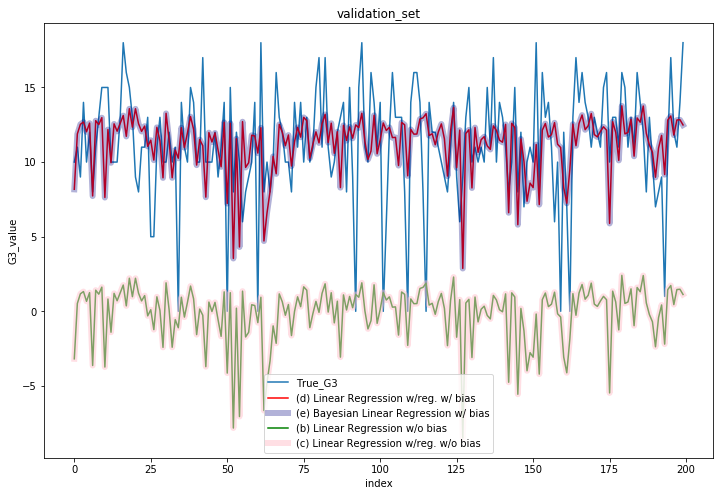

In [27]:
plt.figure(figsize=(12,8))
plt.plot(range(0,len(validation_set['ID'])),validation_set['G3'],label='True_G3')
plt.plot(range(0,len(validation_set['ID'])),y_pred_LR_re_bias,color='red',label='(d) Linear Regression w/reg. w/ bias')
plt.plot(range(0,len(validation_set['ID'])),y_pred_bay,color='navy',alpha=0.3,linewidth=6,label='(e) Bayesian Linear Regression w/ bias')
plt.plot(range(0,len(validation_set['ID'])),y_pred_LR,color='green',alpha=1,label='(b) Linear Regression w/o bias')
plt.plot(range(0,len(validation_set['ID'])),y_pred_LR_re_no_bias,color='pink',alpha=0.5,linewidth=6,label='(c) Linear Regression w/reg. w/o bias')
plt.xlabel('index')
plt.ylabel('G3_value')
plt.title('validation_set')
plt.legend()

### <font color=red> Please compare the RMSEs and predicted G3 values in your report. Also, please explain mathematically why    predicted G3 values are closer to the ground truth for (d) and (e).</font>

#### - <span style='background:yellow'><font color=blue>   如果在前面 Normalization 的步驟中，只對連續型變數做 Normalization，不對轉one-hot encode後的 [1,0] 做Normalization的話，(b)(c)(d)(e)的結果都是很相近的。

#### - <span style='background:yellow'><font color=blue>   但是這裡我們對所有變數(除了 ID、G3)都做了 Normalization。這樣原本有些 column 的值本來應該是0的，現在會變成非0。而 (d)(e) 和 (b)(c) 差別是否有 bias term，所以加了 bias term 來修正，才會是比較接近 ground truth 的。  </font></span>


<span style='background:yellow'><font color=blue>  
<span style='background:yellow'><font color=blue>  In (d)      $\;\hat{w}_{ridge}=(X^{'}X+\frac{\lambda}{2} I_p)^{-1}X^{'}Y$


<span style='background:yellow'><font color=blue>  In (e)     $\;\hat{w}_{Bay}=\big(X^{T}X+\alpha I\big)^{-1}X^{T}Y$

<span style='background:yellow'><font color=blue>  (d) 和 (e) 很相似，只是係數不同<font></span>    

 ### (g) (10%) Apply the model from 1. (e) to test no G3.csv and save your results as StudentID 1.txt. You are       
 
 ###                  allowed to tune α.

In [28]:
alpha=np.linspace(0.001, 50, num=1000)

train_rmse=[]
val_rmse=[]

for i in range(0,len(alpha)):
    
    w,y_hat=Bayesian_LR(X_train_int,y_train,alpha[i])
    
    # training
    y_pred_bay_train=np.matmul(X_train_int,w)
    # RMSE
    train_rmse.append(RMSE(y_train,y_pred_bay_train))
  
    # validation
    y_pred_bay_val=np.matmul(X_val_int,w)
    # RMSE
    val_rmse.append(RMSE(y_val,y_pred_bay_val))

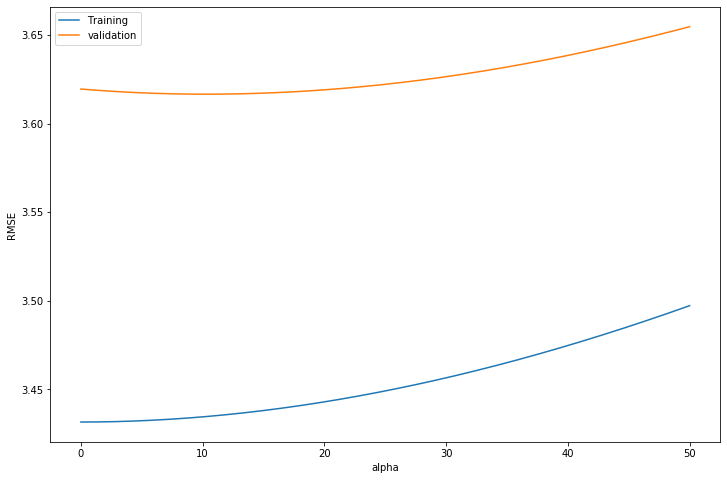

In [29]:
plt.figure(figsize=(12,8))
plt.plot(alpha,train_rmse,label='Training')
plt.plot(alpha,val_rmse,label='validation')
plt.xlabel('alpha')
plt.ylabel('RMSE')
plt.legend()

###   choose alpha 使得 validation_set 的 RMSE 最小

In [30]:
alpha1=alpha[val_rmse.index(min(val_rmse))]
print(alpha1)
w,y_hat=Bayesian_LR(X_train_int,y_train,alpha1)

10.311104104104105


In [31]:
# test set
X_test=np.concatenate(([np.matrix(test_N[test_N.columns[col]]).T for col in range(1,len(test_N.columns))]),axis=1)
X_test_int=np.concatenate(((np.matrix(np.ones(X_test.shape[0])).T,X_test)),axis=1)

In [32]:
y_test_pred=np.asarray(np.matmul(X_test_int,w)).reshape(-1)
y_test_pred

array([11.7658214 , 11.53238099, 12.07611012, 12.14107207, 11.82886946,
       10.6090476 , 11.38565452, 13.45390075, 11.85313967,  9.86451509,
       12.69815522,  9.42080583, 11.90454596, 12.28416698, 10.68218635,
       12.35433229,  3.83488939, 13.58142356,  5.63958089, 13.07113724,
       11.52317128,  9.77260242, 10.20925333, 12.21917056, 11.36656154,
       11.59354976, 12.98492592, 12.03988172, 11.50757414,  8.72848126,
       11.12508044,  5.87788754, 12.12346259, 11.50567537, 11.85560677,
       12.46451662, 12.15800412, 12.89199836, 11.75098985, 13.15973581,
        4.88471356, 12.41319284, 11.58954855, 10.89804324])

In [33]:
outf = open(file="R10h41003.txt", mode="wt")  
for i in range(len(y_test_pred)):
    outf.write(str(1001+i)+"\t"+str(y_test_pred[i])+'\n')
outf.flush()                            
outf.close()

# 2. (20%) Census Income Data Set

#### (a) Try to do 1. (a)-(e) on Census Income Data Set (adult.data and adult.test, for more details, check https://archive.ics.uci.edu/ml/datasets/Census+Income). α is tunable. 

#### Predict target is the last column (>50K, ≤50K). Describe your finding.

# Read Data

In [34]:
con_var=['age','fnlwgt','education-num','capital-gain','capital-loss','hours-per-week']
cate_var=['workclass','education','marital-status','occupation','relationship','race','sex','native-country']
target=['income']

columns=['age', 'workclass', 'fnlwgt','education','education-num','marital-status','occupation','relationship','race','sex','capital-gain','capital-loss','hours-per-week','native-country']

# reading csv files
train =  pd.read_csv('adult.data', sep=",",names=columns+target,index_col=False)
print(train.shape)
train.head()

(32561, 15)


age          workclass  fnlwgt   education  education-num  \
0   39          State-gov   77516   Bachelors             13   
1   50   Self-emp-not-inc   83311   Bachelors             13   
2   38            Private  215646     HS-grad              9   
3   53            Private  234721        11th              7   
4   28            Private  338409   Bachelors             13   

        marital-status          occupation    relationship    race      sex  \
0        Never-married        Adm-clerical   Not-in-family   White     Male   
1   Married-civ-spouse     Exec-managerial         Husband   White     Male   
2             Divorced   Handlers-cleaners   Not-in-family   White     Male   
3   Married-civ-spouse   Handlers-cleaners         Husband   Black     Male   
4   Married-civ-spouse      Prof-specialty            Wife   Black   Female   

   capital-gain  capital-loss  hours-per-week  native-country  income  
0          2174             0              40   United-States   <=50K  
1             0             0              13   United-States   <=50K  
2             0             0              40   United-States   <=50K  
3             0             0              40   United-States   <=50K  
4             0             0              40            Cuba   <=50K

In [35]:
test =  pd.read_csv('adult.test', sep=",",names=columns+target,index_col=False,skiprows=[0])
print(test.shape)
test.head()

(16281, 15)


age   workclass  fnlwgt      education  education-num       marital-status  \
0   25     Private  226802           11th              7        Never-married   
1   38     Private   89814        HS-grad              9   Married-civ-spouse   
2   28   Local-gov  336951     Assoc-acdm             12   Married-civ-spouse   
3   44     Private  160323   Some-college             10   Married-civ-spouse   
4   18           ?  103497   Some-college             10        Never-married   

           occupation relationship    race      sex  capital-gain  \
0   Machine-op-inspct    Own-child   Black     Male             0   
1     Farming-fishing      Husband   White     Male             0   
2     Protective-serv      Husband   White     Male             0   
3   Machine-op-inspct      Husband   Black     Male          7688   
4                   ?    Own-child   White   Female             0   

   capital-loss  hours-per-week  native-country   income  
0             0              40   United-States   <=50K.  
1             0              50   United-States   <=50K.  
2             0              40   United-States    >50K.  
3             0              40   United-States    >50K.  
4             0              30   United-States   <=50K.

# Transform category  columns to one-hot encoding vectors

In [36]:
train=pd.concat([train[target+con_var],pd.DataFrame(pd.get_dummies(train[cate_var]))],axis=1) 
test=pd.concat([test[target+con_var],pd.DataFrame(pd.get_dummies(test[cate_var]))],axis=1) 

In [37]:
test['native-country_ Holand-Netherlands']=0
test=pd.DataFrame(test, columns=train.columns)

# Split train.csv into training set (80%) and validation set (20%)

In [38]:
random.seed(121)
p=0.8
training_set,validation_set=train_valid_split(train,p)

print(training_set.shape)
print(validation_set.shape)

(26048, 109)
(6513, 109)


# Normalization

In [39]:
tra_X_mean=training_set[training_set.columns[1:]].mean(axis=0) #選擇需要 normalized 的變數
tra_X_std=training_set[training_set.columns[1:]].std(axis=0)

In [40]:
training_set_N, validation_set_N,test_N=Normalization(training_set,validation_set,test,tra_X_mean,tra_X_std)

In [41]:
# training set
X_train=np.concatenate(([np.matrix(training_set_N[training_set.columns[col]]).T 
                         for col in range(1,len(training_set.columns))]),axis=1)

# validation_set
X_val=np.concatenate(([np.matrix(validation_set_N[validation_set_N.columns[col]]).T 
                         for col in range(1,len(validation_set_N.columns))]),axis=1)

# test_set
X_test=np.concatenate(([np.matrix(test_N[test_N.columns[col]]).T 
                         for col in range(1,len(test_N.columns))]),axis=1)

In [42]:
y_train=np.matrix(pd.DataFrame(pd.get_dummies(training_set_N[target],drop_first=True))) #income_>50k
y_val=np.matrix(pd.DataFrame(pd.get_dummies(validation_set_N[target],drop_first=True))) #income_>50k
y_test=np.matrix(pd.DataFrame(pd.get_dummies(test_N[target],drop_first=True))) #income_>50k

### Transform  $\hat{w}^T X$  to probability

$P(Y=1|X)=\frac{exp\,(\hat{w}^T X)}{1+exp\,(\hat{w}^T X)}$

$if \; \frac{exp\,(\hat{w}^T X)}{1+exp\,(\hat{w}^T X)}\;  > \; threshold=0.5 \; ,\; then \; \hat{Y}=1 $

In [43]:
def transform_function(X,w,threshold=0.5):
    y_pred_LR=np.matmul(X,w)
    prob=np.asarray(np.exp(y_pred_LR)/(1+np.exp(y_pred_LR))).reshape(-1)
    y_binary_pred=np.copy(prob)
    y_binary_pred[y_binary_pred>threshold]=1.0
    y_binary_pred[y_binary_pred<=threshold]=0.0
    y_binary_pred=y_binary_pred.astype(np.uint8)
    return(prob,y_binary_pred)

In [44]:
threshold=0.5

In [45]:
def accuracy(y,y_binary_pred):
    y=np.asarray(y).reshape(-1)
    y_binary_pred=np.asarray(y_binary_pred).reshape(-1)
    return(sum(y==y_binary_pred)/len(y))

### Linear regression model without the bias term . Use pseudo_inverse to obtain the weights. 

- Calculate $\hat{w}^T X$

In [46]:
# 1-(b) before transformation
w,y_hat=LR(X_train,y_train)

# RMSE
print('RMSE of the validation_set :',RMSE(np.matmul(X_val,w),y_val))
print('RMSE of the test :',RMSE(np.matmul(X_test,w),y_test))


RMSE of the validation_set : 0.41382515698866834
RMSE of the test : 0.4144076582951691


- Transformation

In [47]:
# 1-(b) transformation

# validation_set
prob,y_binary_pred=transform_function(X_val,w,threshold)
print('Accuracy of the validation_set :',accuracy(y_val,y_binary_pred))

# test
prob,y_binary_pred=transform_function(X_test,w,threshold)
print('Accuracy of the test :',accuracy(y_test,y_binary_pred))

Accuracy of the validation_set : 0.7250115154306771
Accuracy of the test : 0.7223143541551502


### Regularization for linear regression model without the bias term 

In [48]:
# 1-(c) before transformation
w,y_hat=LR_Regularization(X_train,y_train,lamb=1)
print('RMSE of the validation_set :',RMSE(np.matmul(X_val,w),y_val))
print('RMSE of the test :',RMSE(np.matmul(X_test,w),y_test))

RMSE of the validation_set : 0.41382513736164184
RMSE of the test : 0.41440759028039653


In [49]:
# 1-(C) transformation

# validation_set
prob,y_binary_pred=transform_function(X_val,w,threshold)
print('Accuracy of the validation_set :',accuracy(y_val,y_binary_pred))

# test
prob,y_binary_pred=transform_function(X_test,w,threshold)
print('Accuracy of the test :',accuracy(y_test,y_binary_pred))

Accuracy of the validation_set : 0.7248579763549824
Accuracy of the test : 0.7223143541551502


### Regularization for linear regression model with the bias term

In [50]:
# Add the bias term
X_train_int=np.concatenate((np.matrix(np.ones(X_train.shape[0])).T,X_train),axis=1)
X_val_int=np.concatenate((np.matrix(np.ones(X_val.shape[0])).T,X_val),axis=1)
X_test_int=np.concatenate((np.matrix(np.ones(X_test.shape[0])).T,X_test),axis=1)

# 1-(d) before transformation
w,y_hat=LR_Regularization(X_train_int,y_train,lamb=1)

print('RMSE of the validation_set :',RMSE(np.matmul(X_val_int,w),y_val))
print('RMSE of the test :',RMSE(np.matmul(X_test_int,w),y_test))

RMSE of the validation_set : 0.3378605918724083
RMSE of the test : 0.3395520935443644


In [51]:
# 1-(d) transformation

# validation_set
prob,y_binary_pred=transform_function(X_val_int,w,threshold)
print('Accuracy of the validation_set :',accuracy(y_val,y_binary_pred))

# test
prob,y_binary_pred=transform_function(X_test_int,w,threshold)
print('Accuracy of the test :',accuracy(y_test,y_binary_pred))

Accuracy of the validation_set : 0.4461845539689851
Accuracy of the test : 0.4398378477980468


### Bayesian linear regression model with the bias term.

### Turn a

In [52]:
alpha=np.linspace(100, 8000000, num=500)
train_acc=[]
val_acc=[]

for i in range(0,len(alpha)):
    
    w,y_hat=Bayesian_LR(X_train_int,y_train,alpha[i])

    # training
    prob,y_binary_pred=transform_function(X_train_int,w,threshold)
    # accurcy
    train_acc.append(accuracy(y_train,y_binary_pred))
  
   # validation
    prob,y_binary_pred_v=transform_function(X_val_int,w,threshold)
    # accurcy
    val_acc.append(accuracy(y_val,y_binary_pred_v))   

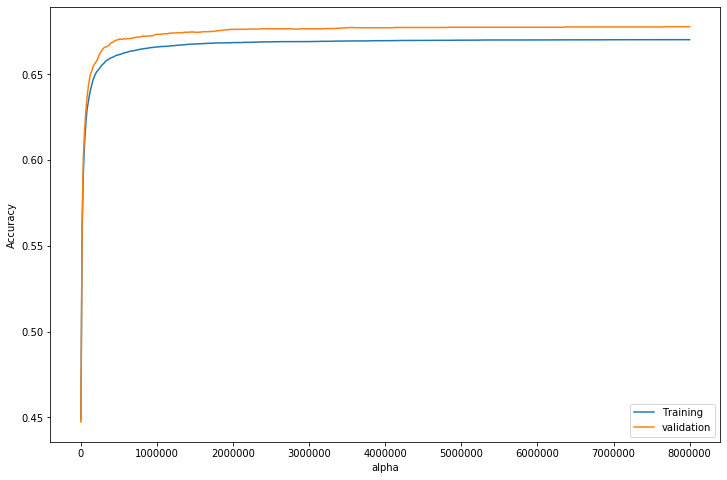

In [53]:
plt.figure(figsize=(12,8))
plt.plot(alpha,train_acc,label='Training')
plt.plot(alpha,val_acc,label='validation')
plt.xlabel('alpha')
plt.ylabel('Accuracy')
plt.legend()

### <font color=blue>  choose alpha 使得 validation_set 的 accuracy 最大</font>

In [54]:
alpha1=alpha[val_acc.index(max(val_acc))]
print(alpha1)

7679362.725450901


In [55]:
# 1-(e) before transformation
w,y_hat=Bayesian_LR(X_train_int,y_train,alpha1)

print('RMSE of the validation_set :',RMSE(np.matmul(X_val_int,w),y_val))
print('RMSE of the test :',RMSE(np.matmul(X_test_int,w),y_test))

RMSE of the validation_set : 0.489480692711753
RMSE of the test : 0.48397703899750827


In [56]:
# 1-(e) transformation

# validation_set
prob,y_binary_pred=transform_function(X_val_int,w,threshold)
print('Accuracy of the validation_set :',accuracy(y_val,y_binary_pred))

# test
prob,y_binary_pred=transform_function(X_test_int,w,threshold)
print('Accuracy of the test :',accuracy(y_test,y_binary_pred))

Accuracy of the validation_set : 0.6778750191923845
Accuracy of the test : 0.6697377310975984


### <font color=red>  Describe your finding ?</font>

因為這題要預測的target不是連續的數值，是(>50k)or(<=50k)，所以要先轉換成 one-hot encoding，然後刪除一個 row，當成 $Y_{true}$

In [57]:
# Y_true
pd.get_dummies(training_set_N[target],drop_first=True).head()

income_ >50K
0             0
1             0
2             0
3             0
4             0

使用兩種 Evaluation funtion :
- RMSE ($\,Y_{true}\,$,$\,\hat{w}^TX\,$)
- Accuracy ($\,Y_{true}\,$,$\,\hat{Y}\,$) ，$if \; \frac{exp\,(\hat{w}^T X)}{1+exp\,(\hat{w}^T X)}\;  > \; threshold=0.5 \; ,\; then \; \hat{Y}=1 $

Evaluation           | (b)LR_w/o_bias  | (c)LR_Reg_w/o_bias | (d)LR_Reg_w/_bias | (e) Bay_LR_w/_bias
------------  | ----  | ---  | ---  | ---
RMSE Test   | 0.4144|  0.4144 |    0.3395 | 0.4839
RMSE validation   | 0.4138 |  0.4138 |    0.3378 | 0.4894
Accuracy Test   | 0.7223 | 0.7223 |  0.4398 | 0.6697
Accuracy validation   | 0.7250 |  0.7248 |    0.4460 | 0.6778

####   <span style='background:yellow'><font color=blue>-  (b) and (c) without bais term 有比較較高的accuracy.

#### <span style='background:yellow'><font color=blue>- (e) 需要將 $\alpha$ 調到極大，才能有效提升accuracy.

#### <span style='background:yellow'><font color=blue>- (d) 的 RMSE 最小，但是 accuracy 卻非常的低。因為 $\hat{w}^TX$ 算出來的值有正負值，但經過transform_function 轉換後，會將 $\hat{w}^TX$ 的值域控制在 0-1，所以會有這樣的現象。

#### <span style='background:yellow'><font color=blue>- 因此在這種target不是連續數值的題目，不適合用RMSE當作評估指標。</font></span>